Meritocracia nas eleições, 5% de margem nos votos

Com o objetivo de fortalecer a democracia e garantir eleições mais justas, foi estabelecido um critério adicional: a diferença mínima de 5% entre os votos do candidato vencedor e do perdedor para uma eleição ser considerada meritocrática. Essa medida busca ampliar a representatividade e legitimidade dos resultados, valorizando a vontade do povo e promovendo a confiança nas instituições democráticas.

In [18]:
#Importando dados das votações do Brasil
import csv

data = [
    ["Ano", "Candidato Vencedor", "Percentual de Votos Vencedor", "Candidato Perdedor",
     "Percentual de Votos Perdedor", "Diferença em Pontos Percentuais", "Meritocrático"],
    [1989, "Collor", 53.03, "Lula", 46.97, 6.06, "Sim"],
    [1998, "FHC", 53.06, "Lula", 31.71, 21.35, "Sim"],
    [2002, "Lula", 61.27, "Serra", 38.72, 22.55, "Sim"],
    [2006, "Lula", 60.83, "Alckmin", 39.17, 21.66, "Sim"],
    [2010, "Dilma", 56.05, "Serra", 43.95, 12.10, "Sim"],
    [2014, "Dilma", 51.64, "Aécio", 48.36, 3.28, "Não"],
    [2018, "Bolsonaro", 55.13, "Haddad", 44.87, 10.26, "Sim"],
    [2022, "Lula", 50.90, "Bolsonaro", 49.10, 1.80, "Não"]
]

filename = "eleicoes.csv"

with open(filename, "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(data)

print("Arquivo 'eleicoes.csv' criado com sucesso.")


Arquivo 'eleicoes.csv' criado com sucesso.


In [19]:
#instalando pandas

!pip install pandas

In [20]:
#instalando scikit

!pip install scikit-learn

Analise percentual de votos

In [22]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('eleicoes.csv', encoding='latin1')

X = df[['Percentual de Votos Vencedor', 'Percentual de Votos Perdedor']]
y = df['Meritocrático']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy}')


Acurácia do modelo: 1.0


In [26]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('eleicoes.csv', encoding='latin1')

X = df[['Percentual de Votos Vencedor', 'Percentual de Votos Perdedor']]
y = df['Meritocrático']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy}')

Acurácia do modelo: 1.0


In [29]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('eleicoes.csv', encoding='latin1')

X = df[['Percentual de Votos Vencedor', 'Percentual de Votos Perdedor']]
y = df['Meritocrático']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MLPClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy}')

Acurácia do modelo: 0.5


In [31]:
df['Diferenca_Perc'] = df['Percentual de Votos Vencedor'] - df['Percentual de Votos Perdedor']


Aqui os dados Históricos

In [38]:
import pandas as pd

data = {
    'Ano': [1989, 1998, 2002, 2006, 2010, 2014, 2018, 2022],
    'Candidato': ['Collor', 'FHC', 'Lula', 'Lula', 'Dilma', 'Dilma', 'Bolsonaro', 'Lula'],
    'Percentual Votos Anterior': [None, 43.29, 47.75, 61.27, 56.05, 51.64, 46.03, 48.36]
}

df_historico = pd.DataFrame(data)

df_historico.to_csv('dados_historicos.csv', index=False)

In [39]:
import pandas as pd

df_historico = pd.read_csv('dados_historicos.csv')

# Adicionar características históricas para cada eleição
df_historico.loc[df_historico['Ano'] == 1989, 'Caracteristica_Historica'] = 'Primeira eleição após a redemocratização'
df_historico.loc[df_historico['Ano'] == 1998, 'Caracteristica_Historica'] = 'Reeleição de FHC'
df_historico.loc[df_historico['Ano'] == 2002, 'Caracteristica_Historica'] = 'Eleição de Lula pela primeira vez'
df_historico.loc[df_historico['Ano'] == 2006, 'Caracteristica_Historica'] = 'Reeleição de Lula'
df_historico.loc[df_historico['Ano'] == 2010, 'Caracteristica_Historica'] = 'Eleição de Dilma pela primeira vez'
df_historico.loc[df_historico['Ano'] == 2014, 'Caracteristica_Historica'] = 'Reeleição de Dilma'
df_historico.loc[df_historico['Ano'] == 2018, 'Caracteristica_Historica'] = 'Eleição de Bolsonaro'
df_historico.loc[df_historico['Ano'] == 2022, 'Caracteristica_Historica'] = 'Retorno de Lula à presidência'

# Salvar as alterações no arquivo CSV
df_historico.to_csv('dados_historicos.csv', index=False)

In [42]:
import pandas as pd

df_historico = pd.read_csv('dados_historicos.csv')

df = pd.merge(df, df_historico[['Ano', 'Candidato', 'Percentual Votos Anterior']],
              left_on=['Candidato Vencedor', 'Ano'], right_on=['Candidato', 'Ano'], how='left')
df.rename(columns={'Percentual Votos Anterior': 'Percentual Votos Anterior Vencedor'}, inplace=True)

df = pd.merge(df, df_historico[['Ano', 'Candidato', 'Percentual Votos Anterior']],
              left_on=['Candidato Perdedor', 'Ano'], right_on=['Candidato', 'Ano'], how='left')
df.rename(columns={'Percentual Votos Anterior': 'Percentual Votos Anterior Perdedor'}, inplace=True)


C:\Users\desktop\AppData\Local\Temp\ipykernel_9340\1014647215.py:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Candidato_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df, df_historico[['Ano', 'Candidato', 'Percentual Votos Anterior']],


In [17]:
import pandas as pd

data = {
    'Ano': [1989, 1998, 2002, 2006, 2010, 2014, 2018, 2022],
    'Candidato': ['Collor', 'FHC', 'Lula', 'Lula', 'Dilma', 'Dilma', 'Bolsonaro', 'Lula'],
    'Percentual Votos Anterior': [None, 43.29, 47.75, 61.27, 56.05, 51.64, 46.03, 48.36]
}

df_historico = pd.DataFrame(data)

df_historico.to_csv('dados_historicos.csv', index=False)


In [57]:
import pandas as pd

df_historico = pd.read_csv('dados_historicos.csv')

# Adicionar características históricas para cada eleição
df_historico.loc[df_historico['Ano'] == 1989, 'Caracteristica_Historica'] = 'Primeira eleição após a redemocratização'
df_historico.loc[df_historico['Ano'] == 1998, 'Caracteristica_Historica'] = 'Reeleição de FHC'
df_historico.loc[df_historico['Ano'] == 2002, 'Caracteristica_Historica'] = 'Eleição de Lula pela primeira vez'
df_historico.loc[df_historico['Ano'] == 2006, 'Caracteristica_Historica'] = 'Reeleição de Lula'
df_historico.loc[df_historico['Ano'] == 2010, 'Caracteristica_Historica'] = 'Eleição de Dilma pela primeira vez'
df_historico.loc[df_historico['Ano'] == 2014, 'Caracteristica_Historica'] = 'Reeleição de Dilma'
df_historico.loc[df_historico['Ano'] == 2018, 'Caracteristica_Historica'] = 'Eleição de Bolsonaro'
df_historico.loc[df_historico['Ano'] == 2022, 'Caracteristica_Historica'] = 'Retorno de Lula à presidência'

# Salvar as alterações no arquivo CSV
df_historico.to_csv('dados_historicos.csv', index=False)

In [58]:
df['Faixa_Votos_Vencedor'] = pd.cut(df['Percentual de Votos Vencedor'], bins=[0, 40, 50, 100], labels=['<40%', '40-50%', '>50%'])

In [59]:
import pandas as pd

# Dados socioeconômicos de cada ano de eleição
dados = {
    'Ano': [1989, 1998, 2002, 2006, 2010, 2014, 2018, 2022],
    'GDP': [3.22, -3.06, 1.66, 0.76, 7.65, -2.5, 0.46, 7.5],
    'UnemploymentRate': [3, 10.2, 10.6, 9.7, 8, 8.5, 12.3, 9.2],
    'InflationRate': [1030.7, 3.2, 8.5, 4.2, 5, 6.3, 3.7, 9.3]
}

df_socioeconomicos = pd.DataFrame(dados)

df_socioeconomicos.to_csv('dados_socioeconomicos.csv', index=False)


In [60]:
df_socioeconomico = pd.read_csv('dados_socioeconomicos.csv')

df = pd.merge(df, df_socioeconomico, on='Ano', how='left')


In [61]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

df = pd.read_csv('eleicoes.csv', encoding='latin1')

X = df[['Percentual de Votos Vencedor', 'Percentual de Votos Perdedor']]
y = df['Meritocrático']

model = LogisticRegression()

scores = cross_val_score(model, X, y, cv=5)

mean_accuracy = scores.mean()

print(f'Acurácia média da validação cruzada: {mean_accuracy}')



Acurácia média da validação cruzada: 0.9


C:\Users\desktop\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Aqui dados socioeconômicos

In [62]:
import pandas as pd

dados = {
    'Ano': [1989, 1998, 2002, 2006, 2010, 2014, 2018, 2022],
    'GDP': [3.22, -3.06, 1.66, 0.76, 7.65, -2.5, 0.46, 7.5],
    'UnemploymentRate': [3, 10.2, 10.6, 9.7, 8, 8.5, 12.3, 9.2],
    'InflationRate': [1030.7, 3.2, 8.5, 4.2, 5, 6.3, 3.7, 9.3]
}

df_socioeconomicos = pd.DataFrame(dados)

df_socioeconomicos.to_csv('dados_socioeconomicos.csv', index=False)


In [63]:
df_socioeconomico = pd.read_csv('dados_socioeconomicos.csv')

df = pd.merge(df, df_socioeconomico, on='Ano', how='left')

Validação Cruzada

In [64]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

df = pd.read_csv('eleicoes.csv', encoding='latin1')

X = df[['Percentual de Votos Vencedor', 'Percentual de Votos Perdedor']]
y = df['Meritocrático']

model = LogisticRegression()

scores = cross_val_score(model, X, y, cv=5)

mean_accuracy = scores.mean()

print(f'Acurácia média da validação cruzada: {mean_accuracy}')

Acurácia média da validação cruzada: 0.9


C:\Users\desktop\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [65]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Análise exploratória de dados

    Ano Candidato Vencedor  Percentual de Votos Vencedor Candidato Perdedor  \
0  1989             Collor                         53.03               Lula   
1  1998                FHC                         53.06               Lula   
2  2002               Lula                         61.27              Serra   
3  2006               Lula                         60.83            Alckmin   
4  2010              Dilma                         56.05              Serra   

   Percentual de Votos Perdedor  Diferença em Pontos Percentuais Meritocrático  
0                         46.97                             6.06           Sim  
1                         31.71                            21.35           Sim  
2                         38.72                            22.55           Sim  
3                         39.17                            21.66           Sim  
4                         43.95                            12.10           Sim  
              Ano  Percentual de Votos 

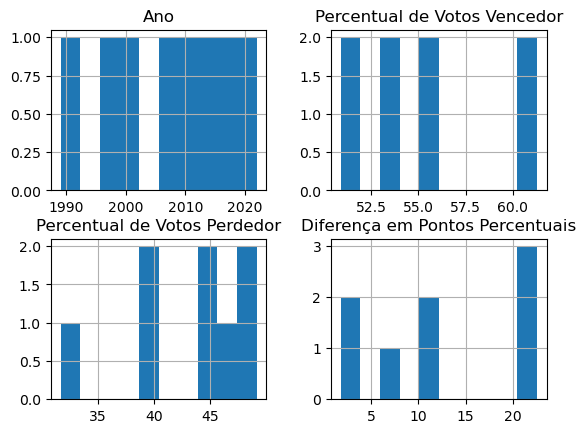

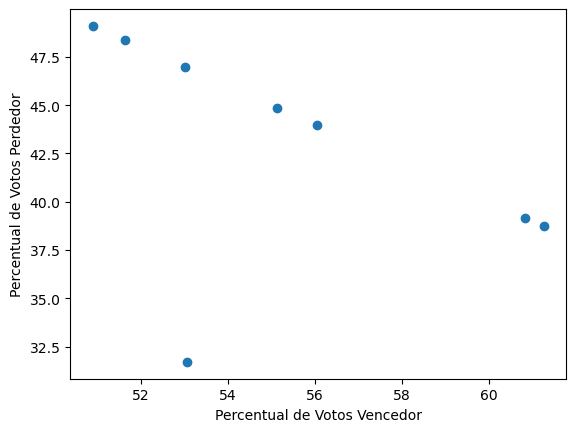

In [66]:

import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('eleicoes.csv', encoding='latin1')

# Visualizar as primeiras linhas do DataFrame
print(df.head())

# Resumo estatístico dos dados
print(df.describe())

# Histograma das características numéricas
df.hist()
plt.show()

# Gráfico de dispersão entre as características 'Percentual de Votos Vencedor' e 'Percentual de Votos Perdedor'
plt.scatter(df['Percentual de Votos Vencedor'], df['Percentual de Votos Perdedor'])
plt.xlabel('Percentual de Votos Vencedor')
plt.ylabel('Percentual de Votos Perdedor')
plt.show()


Porcentagem dos votos/Meritocracia

In [67]:
import pandas as pd

# Carregar os dados
df = pd.read_csv('eleicoes.csv', encoding='latin1')

# Criar colunas para indicar se a eleição é meritocrática ou não com base nos votos
df['Meritocratico_Nao'] = df['Percentual de Votos Vencedor'] < df['Percentual de Votos Perdedor']
df['Meritocratico_Sim'] = df['Percentual de Votos Vencedor'] >= df['Percentual de Votos Perdedor']

# Exibir o DataFrame resultante
print(df)


    Ano Candidato Vencedor  Percentual de Votos Vencedor Candidato Perdedor  \
0  1989             Collor                         53.03               Lula   
1  1998                FHC                         53.06               Lula   
2  2002               Lula                         61.27              Serra   
3  2006               Lula                         60.83            Alckmin   
4  2010              Dilma                         56.05              Serra   
5  2014              Dilma                         51.64              Aécio   
6  2018          Bolsonaro                         55.13             Haddad   
7  2022               Lula                         50.90          Bolsonaro   

   Percentual de Votos Perdedor  Diferença em Pontos Percentuais  \
0                         46.97                             6.06   
1                         31.71                            21.35   
2                         38.72                            22.55   
3               

Eleições apertadas

In [68]:
import pandas as pd

# Carregar os dados
df = pd.read_csv('eleicoes.csv', encoding='latin1')

# Extração 1: Percentual de votos do vencedor foi maior que 50%
eleicoes_maior_50 = df[df['Percentual de Votos Vencedor'] > 50]

# Extração 2: Percentual de votos do perdedor foi menor que 30%
eleicoes_menor_30 = df[df['Percentual de Votos Perdedor'] < 30]

# Extração 4: Diferença apertada entre vencedor e perdedor (diferença menor que 5 pontos percentuais)
eleicoes_diferenca_apertada = df[abs(df['Percentual de Votos Vencedor'] - df['Percentual de Votos Perdedor']) < 5]

# Exibir os resultados
print("Eleições com percentual de votos do vencedor maior que 50%:")
print(eleicoes_maior_50)
print("\n")

print("Eleições com percentual de votos do perdedor menor que 30%:")
print(eleicoes_menor_30)
print("\n")

print("Eleições com diferença apertada entre vencedor e perdedor (diferença menor que 5 pontos percentuais):")
print(eleicoes_diferenca_apertada)


Eleições com percentual de votos do vencedor maior que 50%:
    Ano Candidato Vencedor  Percentual de Votos Vencedor Candidato Perdedor  \
0  1989             Collor                         53.03               Lula   
1  1998                FHC                         53.06               Lula   
2  2002               Lula                         61.27              Serra   
3  2006               Lula                         60.83            Alckmin   
4  2010              Dilma                         56.05              Serra   
5  2014              Dilma                         51.64              Aécio   
6  2018          Bolsonaro                         55.13             Haddad   
7  2022               Lula                         50.90          Bolsonaro   

   Percentual de Votos Perdedor  Diferença em Pontos Percentuais Meritocrático  
0                         46.97                             6.06           Sim  
1                         31.71                            21.35  

Estatísticas econômicas e contexto Histórico

In [69]:
import pandas as pd

# Imprimir os DataFrames
print("Estatísticas Econômicas:")
display(df_socioeconomicos)
print("\n")

# Exibir o contexto histórico
print("Contexto Histórico:")
display(df_historico)


Estatísticas Econômicas:


,Ano,GDP,UnemploymentRate,InflationRate
0,1989,3.22,3.0,1030.7
1,1998,-3.06,10.2,3.2
2,2002,1.66,10.6,8.5
3,2006,0.76,9.7,4.2
4,2010,7.65,8.0,5.0
5,2014,-2.50,8.5,6.3
6,2018,0.46,12.3,3.7
7,2022,7.50,9.2,9.3




Contexto Histórico:


,Ano,Candidato,Percentual Votos Anterior,Caracteristica_Historica
0,1989,Collor,NaN,Primeira eleição após a redemocratização
1,1998,FHC,43.29,Reeleição de FHC
2,2002,Lula,47.75,Eleição de Lula pela primeira vez
3,2006,Lula,61.27,Reeleição de Lula
4,2010,Dilma,56.05,Eleição de Dilma pela primeira vez
5,2014,Dilma,51.64,Reeleição de Dilma
6,2018,Bolsonaro,46.03,Eleição de Bolsonaro
7,2022,Lula,48.36,Retorno de Lula à presidência


Diferença em Pontos Percentuais em Grafico

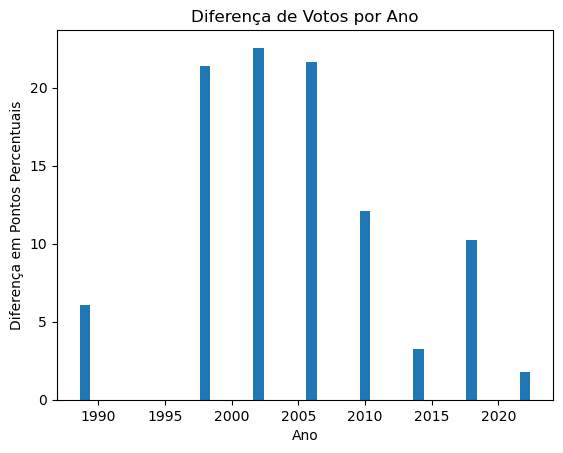

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('eleicoes.csv', encoding='latin1')

years = df['Ano']
vote_difference = df['Diferença em Pontos Percentuais']

plt.bar(years, vote_difference)
plt.xlabel('Ano')
plt.ylabel('Diferença em Pontos Percentuais')
plt.title('Diferença de Votos por Ano')
plt.show()



In [ ]:
import pandas as pd

# Carregar os dados
df = pd.read_csv('eleicoes.csv', encoding='latin1')

# Prompt 1: Percentual de votos do vencedor
vencedor_min, vencedor_max = map(float, input("Digite o valor mínimo e máximo do percentual de votos do vencedor desejado (separados por espaço): ").split())
eleicoes_vencedor = df[(df['Percentual de Votos Vencedor'] >= vencedor_min) & (df['Percentual de Votos Vencedor'] <= vencedor_max)]

# Prompt 2: Percentual de votos do perdedor
perdedor_min, perdedor_max = map(float, input("Digite o valor mínimo e máximo do percentual de votos do perdedor desejado (separados por espaço): ").split())
eleicoes_perdedor = df[(df['Percentual de Votos Perdedor'] >= perdedor_min) & (df['Percentual de Votos Perdedor'] <= perdedor_max)]

# Prompt 3: Diferença de votos entre o vencedor e o perdedor
diferenca_min, diferenca_max = map(float, input("Digite o valor mínimo e máximo da diferença de votos desejada (separados por espaço): ").split())
eleicoes_diferenca = df[(df['Diferença em Pontos Percentuais'] >= diferenca_min) & (df['Diferença em Pontos Percentuais'] <= diferenca_max)]

# Exibir os resultados
print("Eleições com percentual de votos do vencedor entre", vencedor_min, "e", vencedor_max, "porcento:")
print(eleicoes_vencedor)
print("\n")

print("Eleições com percentual de votos do perdedor entre", perdedor_min, "e", perdedor_max, "porcento:")
print(eleicoes_perdedor)
print("\n")

print("Eleições com diferença de votos entre o vencedor e o perdedor entre", diferenca_min, "e", diferenca_max, "porcento:")
print(eleicoes_diferenca)